# E2a: Küchentischversuch zum Laval-Rotor

Name: Moritz 
Datum:  Roth

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: Wie groß sind die gemessenen Beschleunigungen der Werkzeuge? Gibt es aufgrund der anderen Drehzahlen dedektierbare Beschleunigungsunterschiede und falls ja wie groß sind diese? Welche fehlerquellen gibt es bei einer solchen Messung?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="pictures_lavalr_home/bohrmaschineversuch.jpg" width="800">


- Beschreibung des Aufbaus: Zuerst wurde der Beschleunigungssensor ordnungsgemäß mit dem Pi verbunden und dafür gesorgt, dass die Vebindungskabel lang genug sind. Anschließend wurde der Beschleunigungssensor am vorderen Ende der Bohrmaschine mit Tesa ausreichend befestigt,so das sich der Aufsatz nach drehen kann.
- Vorgangsbeschreibung: nach Ordnungsgemäßer vorbereitung des Versuchs starte ich manuell die Bohrmaschine und lasse sie auf Drehzal kommen. Kurze Zeit spätert starte ich die Messung am Pc. nachdem die Messdauer vergangen ist, stoppe ich die Bohrmaschine und schaue ob die Messung erfolgreich abgelaufen ist und eine hdf5 Datei erzeugt wurde.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [19]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [20]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = '/home/pi/lavalrotor_home_experiment/measurement_data' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20231229_180681_moritz_roth_bohrmaschine.h5' # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [21]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "/home/pi/lavalrotor_home_experiment/measurement_data/data_20231229_180618_moritz_roth_bohrmaschine/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "/home/pi/lavalrotor_home_experiment/measurement_data/data_20231229_180618_moritz_roth_bohrmaschine/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "/home/pi/lavalrotor_home_experiment/measurement_data/data_20231229_180618_moritz_roth_bohrmaschine/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eea64ef-197

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [22]:
import h5py 

path_hdf5 = '/home/pi/lavalrotor_home_experiment/measurement_data/data_20231229_180618_moritz_roth_bohrmaschine/data_20231229_180618_moritz_roth_bohrmaschine.h5'

with h5py.File(path_hdf5,'r') as hdf5_file:
    
    dataset = hdf5_file['1ee847be-fddd-6ee4-892a-68c4555b0981']

    time = np.array(dataset['timestamp'])
    accel_x = np.array(dataset['acceleration_x'])
    accel_y = np.array(dataset['acceleration_y'])
    accel_z = np.array(dataset['acceleration_z'])

#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [23]:
betrag_accel = get_vec_accel(accel_x,accel_y,accel_z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0, 0.5, 'Differenz der Zeitschritte')

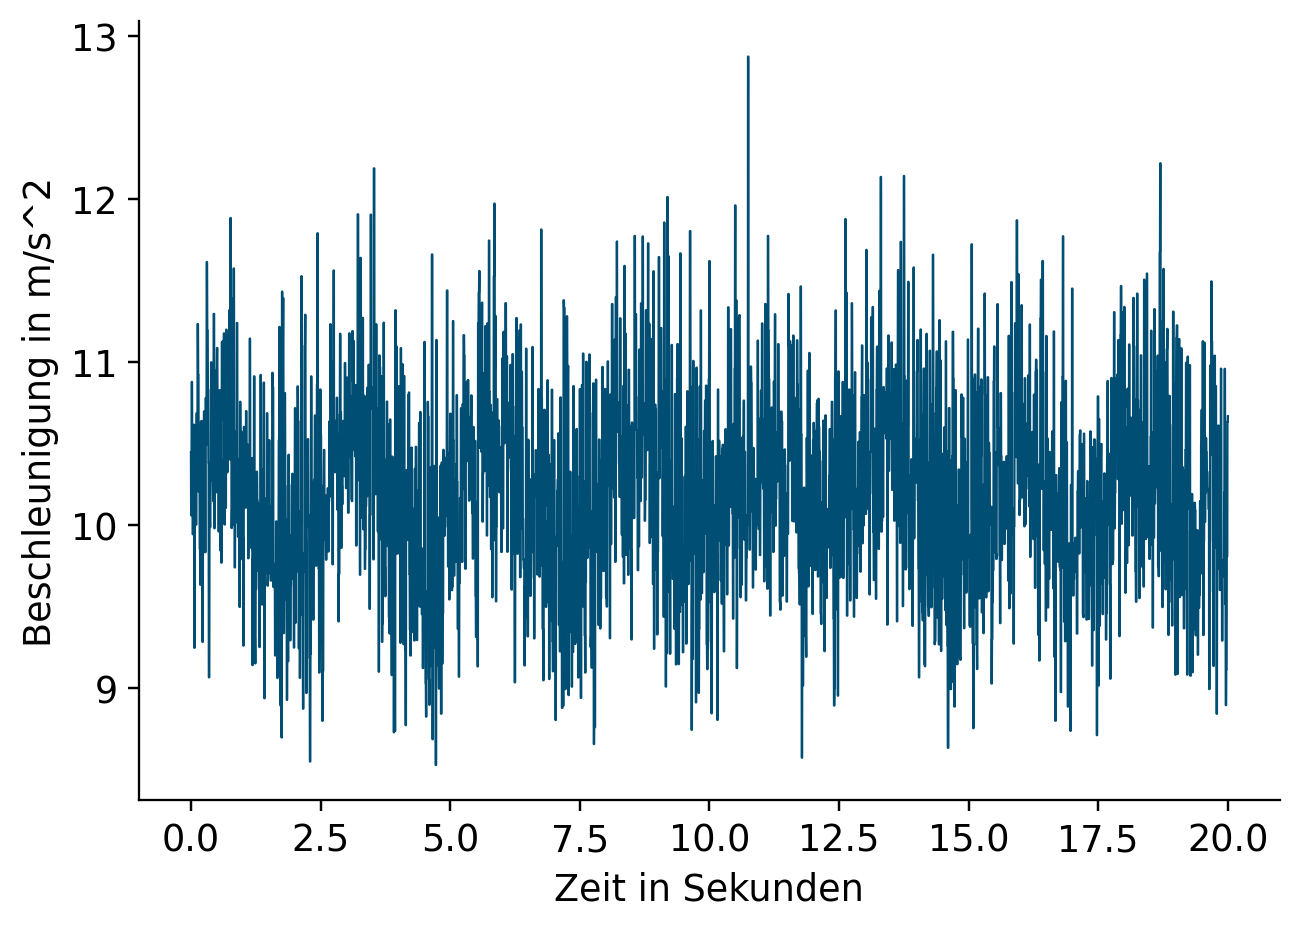

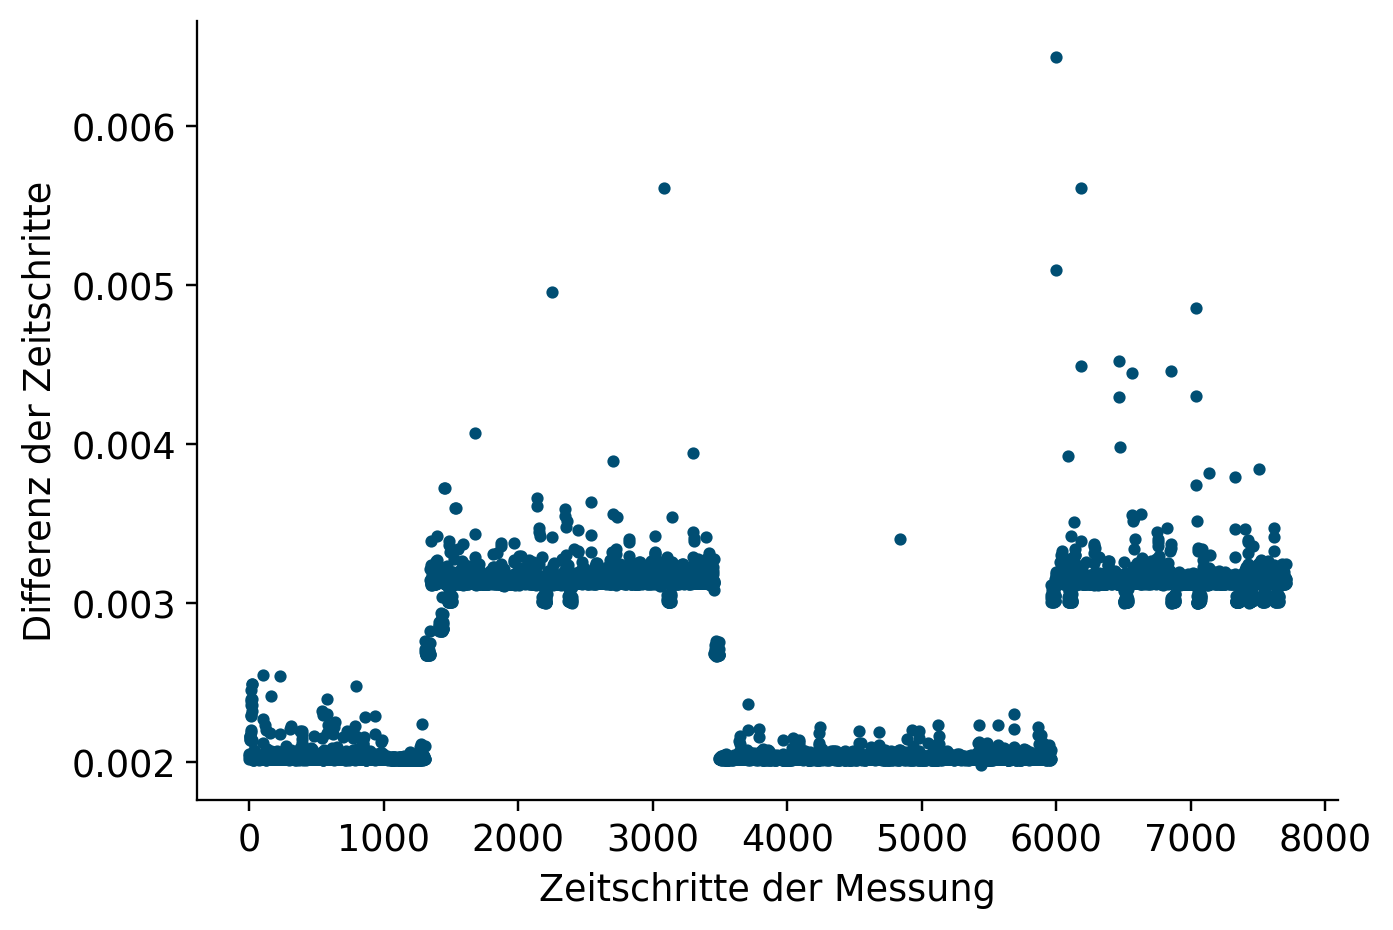

In [24]:
 fig = plt.figure()
plt.plot(time, betrag_accel)
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in m/s^2')

delta_t_list = []#liste für zeitlichen Abstände der Messpunkte
for i in range(1, (len(time))):
    delta_t_list.append(time[i] - time[i-1])#differenz zum vorherigen zeitschritt in liste hinzufügen
    
fig2 = plt.figure()
plt.plot(delta_t_list, '.')
plt.xlabel('Zeitschritte der Messung')
plt.ylabel('Differenz der Zeitschritte')

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [25]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

a = interpolation(time, betrag_accel)#messwerte_interpoliert

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

Text(0, 0.5, 'relative Amplitude')

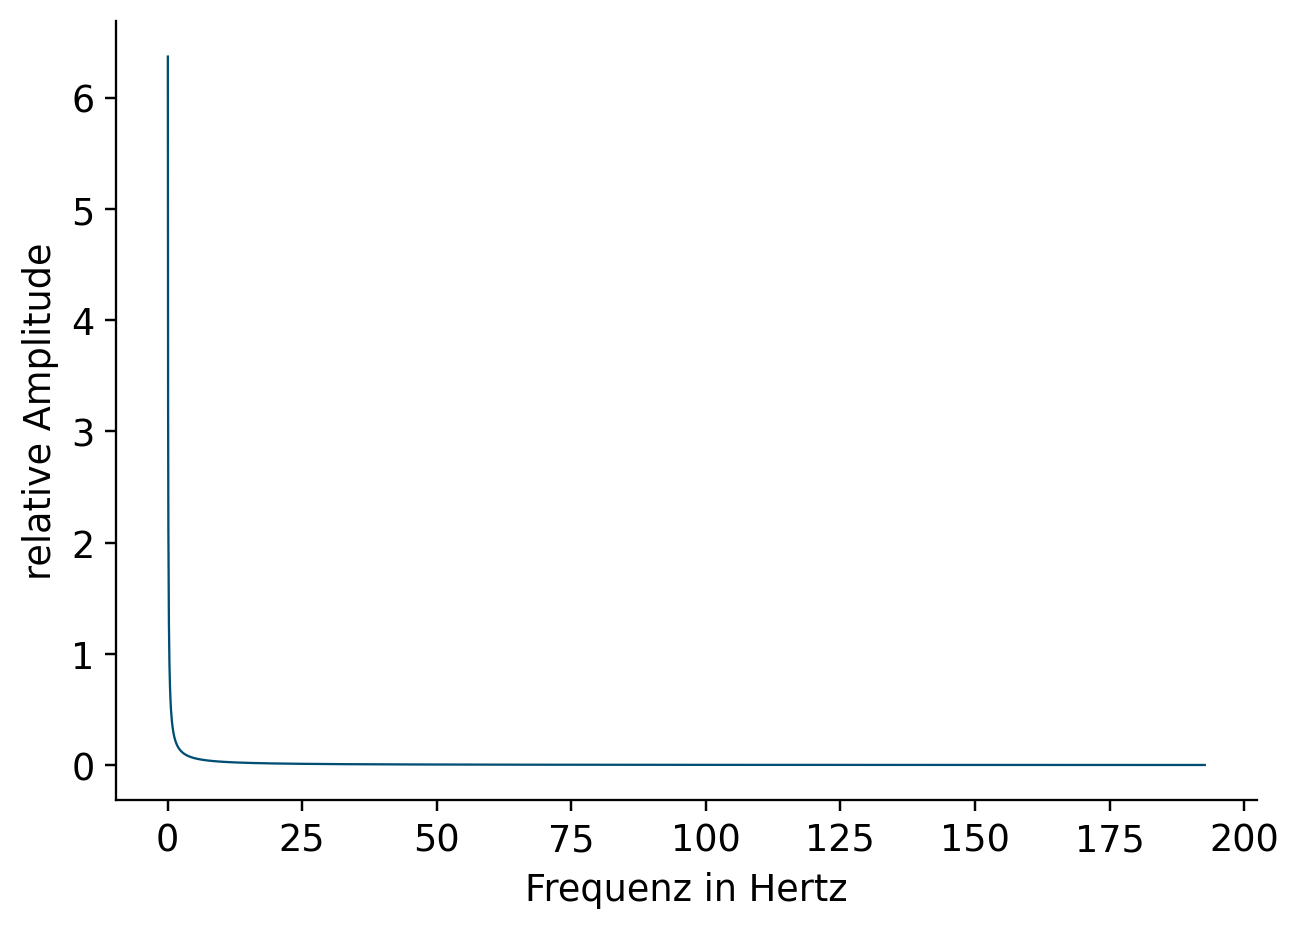

In [26]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

X_oneside, f_oneside = my_fft(a, time)#f_oneside

fig2 = plt.figure()
#plt.plot(f_oneside, np.abs(X_oneside))
plt.plot(f_oneside[1:], np.abs(X_oneside)[1:])
#plt.plot(f_oneside, np.abs(X_oneside))
plt.xlabel('Frequenz in Hertz')
plt.ylabel('relative Amplitude')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="pictures_lavalr_home/flexversuch.jpg" width="800">

- Beschreibung des Aufbaus: Zuerst wurde der Beschleunigungssensor ordnungsgemäß mit dem Pi verbunden und dafür gesorgt, dass die Vebindungskabel lang genug sind. Anschließend wurde der Beschleunigungssensor am oberen Ende der Felx mit Tesa ausreichend befestigt,so er nicht abfallen kann.
- Vorgangsbeschreibung: nach Ordnungsgemäßer vorbereitung des Versuchs starte ich manuell die Flex und anschließend starte ich die Messung am Pc. Nachdem die Messdauer vergangen ist, stoppe ich die Bohrmaschine und schaue ob die Messung erfolgreich abgelaufen ist und eine hdf5 Datei erzeugt wurde.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [27]:
path_measurement_folder = '/home/pi/lavalrotor_home_experiment/measurement_data' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20231229_180681_moritz_roth_flex.h5' # replace None by the filename of the hdf5-file

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [28]:
import h5py 

path_hdf5 = '/home/pi/lavalrotor_home_experiment/measurement_data/data_20231229_182257_moritz_roth_flex/data_20231229_182257_moritz_roth_flex.h5'

with h5py.File(path_hdf5,'r') as hdf5_file:
    
    dataset = hdf5_file['1ee847be-fddd-6ee4-892a-68c4555b0981']

    time = np.array(dataset['timestamp'])
    accel_x = np.array(dataset['acceleration_x'])
    accel_y = np.array(dataset['acceleration# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - _y'])
    accel_z = np.array(dataset['acceleration_z'])

#### 2. Betrag der Beschleunigung berechnen


In [29]:
betrag_accel = get_vec_accel(accel_x,accel_y,accel_z)

#### 3. Darstellung der Messdaten

Text(0, 0.5, 'Differenz der Zeitschritte')

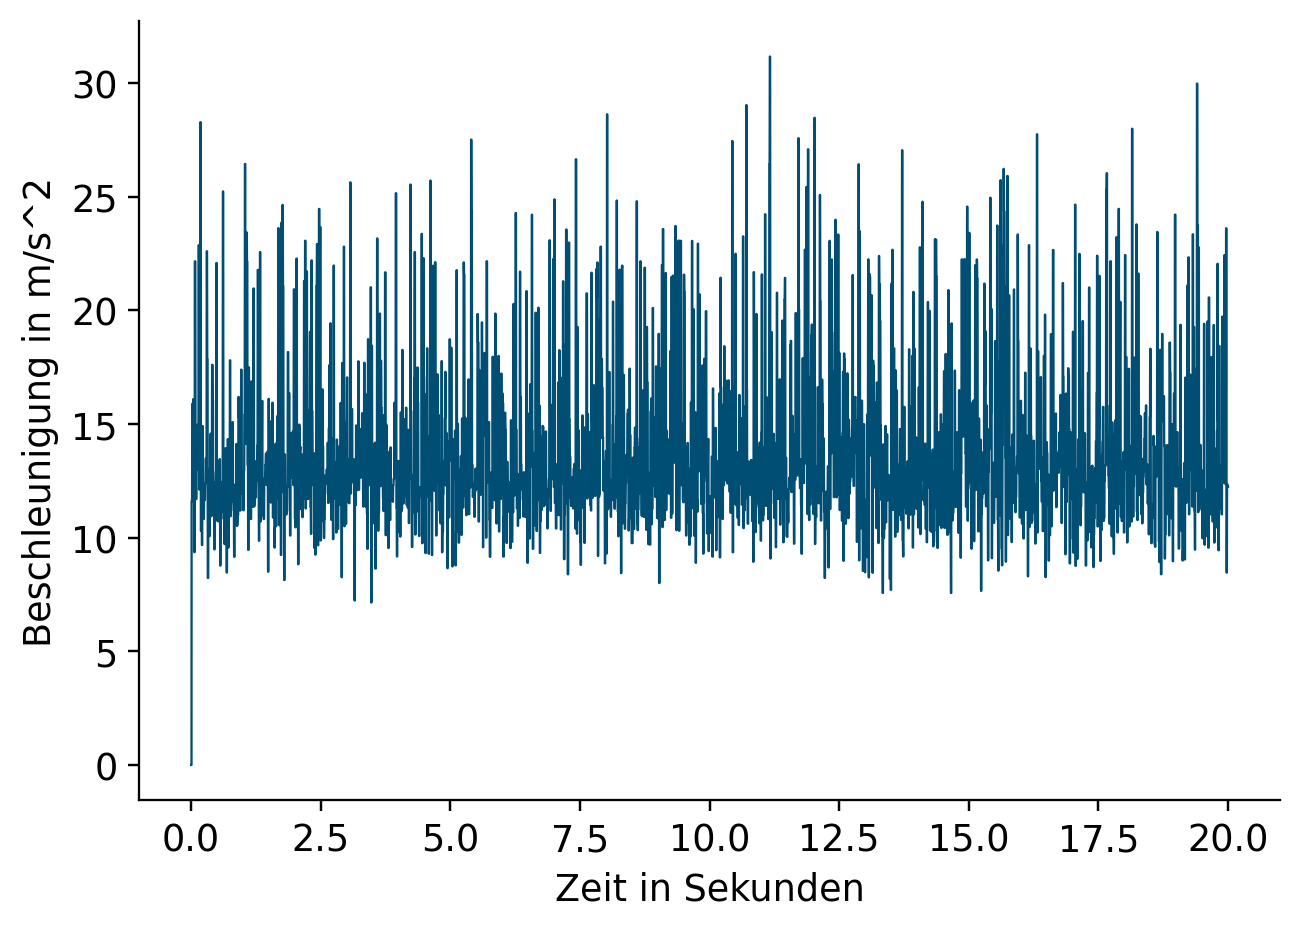

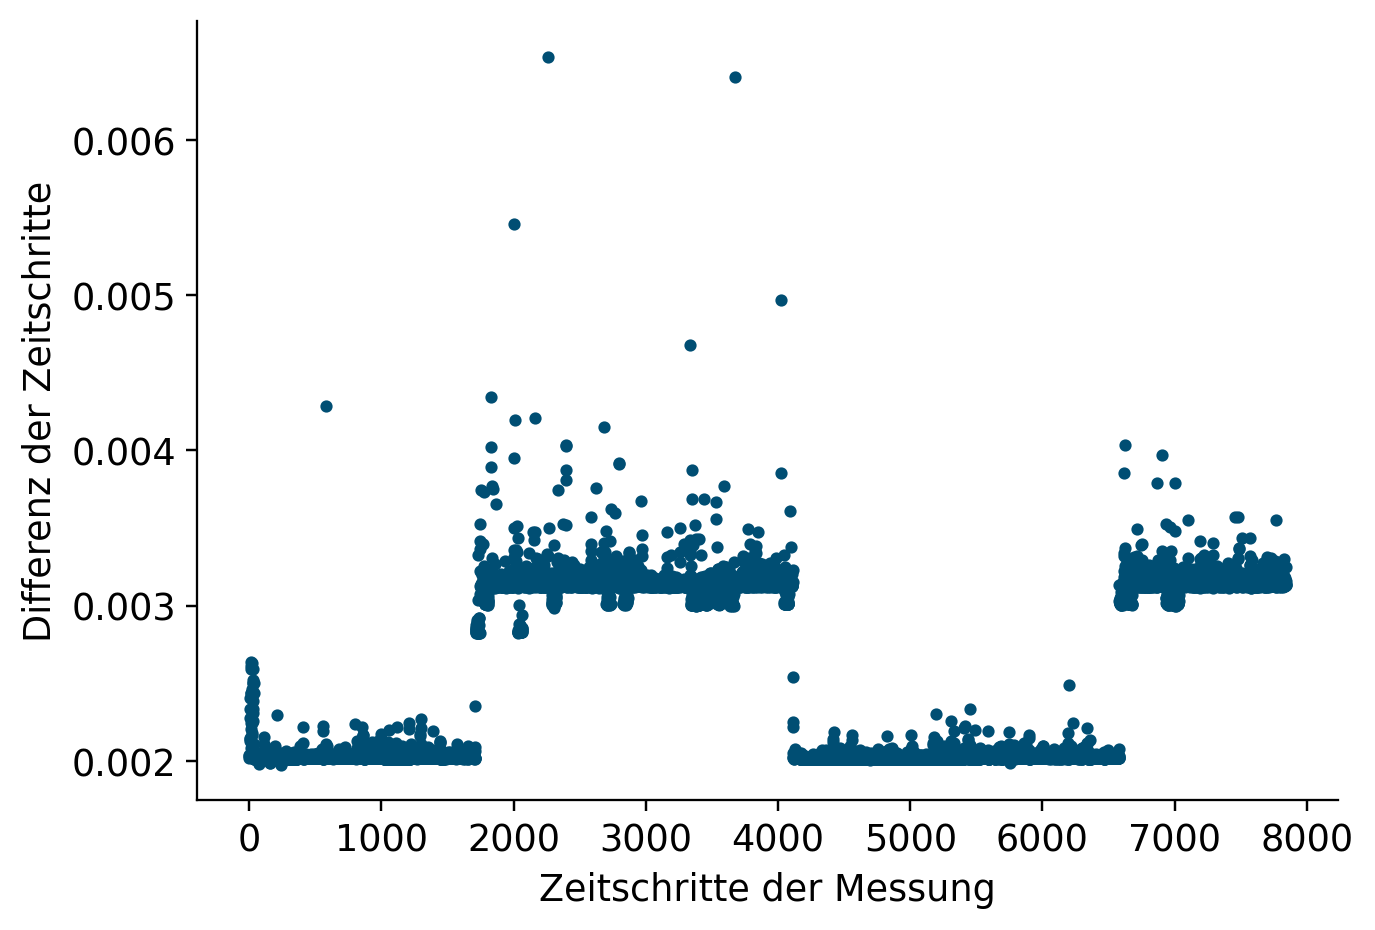

In [30]:
 fig = plt.figure()
plt.plot(time, betrag_accel)
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in m/s^2')

delta_t_list = []#liste für zeitlichen Abstände der Messpunkte
for i in range(1, (len(time))):
    delta_t_list.append(time[i] - time[i-1])#differenz zum vorherigen zeitschritt in liste hinzufügen
    
fig2 = plt.figure()
plt.plot(delta_t_list, '.')
plt.xlabel('Zeitschritte der Messung')
plt.ylabel('Differenz der Zeitschritte')

#### 4. Interpolation der Messwerte



In [31]:
messwerte_interpoliert = interpolation(time, betrag_accel)

#### 5 & 6. FFT durchführen und graphisch darstellen


Text(0, 0.5, 'relative Amplitude')

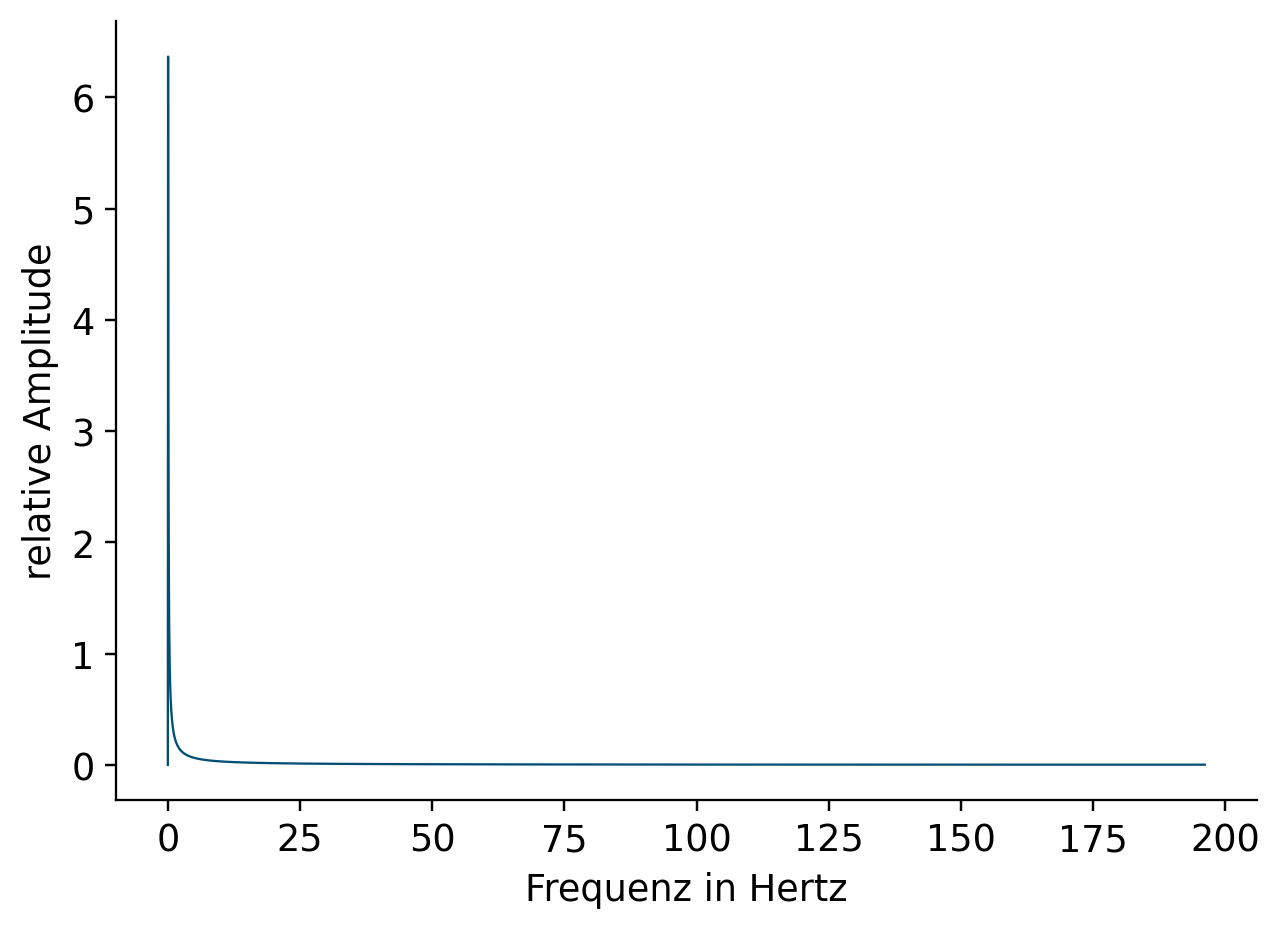

In [32]:
X_oneside, f_oneside = my_fft(messwerte_interpoliert, time)#f_oneside


#print(X_oneside)
#print(f_oneside)
fig2 = plt.figure()
plt.plot(f_oneside, np.abs(X_oneside))
#plt.plot(f_oneside, np.abs(X_oneside))
plt.xlabel('Frequenz in Hertz')
plt.ylabel('relative Amplitude')
# - - - - - - - - - - - - - - - - - - - - - - - - - -

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Abschließend lässt sich sagen, dass der Küschentischversuch relativ einfach aufzubauen und durchzuführen war. Dabei sind auch plausiebele Messergebnisse zum vorschein gekommen, welche trotz der unterschiedlichen Versuchsobjekten in einem ähnlichen Bereich liegen. Auffällig sind nur die Aussreißer mancher Zeitschritte, was auf den PI und seine Messintervalle zurück zuführen sein sollte.

Wenn man sich nun die ergebnisse der Beschleunigung über der Zeit anschaut sieht man ganz klar, dass die felx einen viel größere Amplitude besitzt als die Bohrmaschine, was sich auf die viel größere Umdrehungsgeschwindigkeit zurückführen lässt. Und die Anfangs gestellte Forscherfrage beantwortet ob die Umdrwehungsgeschwindigkeit einen Einfluss auf die gemessene Beschleunigung hat.Dewsweiteren ist nochj auffällig, dass nach der Fourier Transformation der Abgebildete Grafen nicht ganz meinen Erwartungen entspricht, da diese beide zum start einen extrem hohe amplitude besitzen und dann über den restlichen Messbereich auf 0 schlagartig abnimmt.Meine erste vermutung lag darin, dass der erste wert nur stark abweicht. Doch als ich diesen aus dem Grafen raus genommen habe, um eine Abhänigkeit zu Prüfen hat sich der Graf leider nicht verändert. 

Schlussendlich kann man bei wiederholen des Versuchs noch besser darauf acheten den Sensor auf der Probe zu befestigen und ein genaueres Messgerät verwenden um exaktere Beschleunigungen zu bestimmen und schlussendlich eine genauere Auswertung zu erhalten.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Zusammengefasst lässt sich sagen, das der Versuch sehr Interessant war und mir auch Spaß gemacht hat. Dies lag daran, dass man sich in dem Studium bishr noch nicht mit einem Beschleunigungssensor und der Messung von Beschleunigungen auseinander gesetzt hat und somit "Haushaltsgeräte" einfach untersuchen konnte.Als besonderheit sind mir die Messausreißer des PIs im Kopf geblieben, da ich damit nicht gerechnet habe und auch nicht beachtet hätte wenn es nicht erwähnt worden wäre. Abschließend würde ich den versuch als gelungen Bewerten, da ich die Probemaschinen erfolgreich untersucht und deren beschleunigung gemessen habe. Ausschließlich die Auswertung hat mich ins Grübeln gebacht, da man keine Vergleichswerte besitze und somit die ganze Zeit bei meinen Ergebnissen eine gewisse Unsicherheit mitgelaufen ist.
 